In [5]:
%matplotlib widget
from ipywidgets import VBox, HBox, Text, Button, widgets, Layout
from IPython.display import display
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
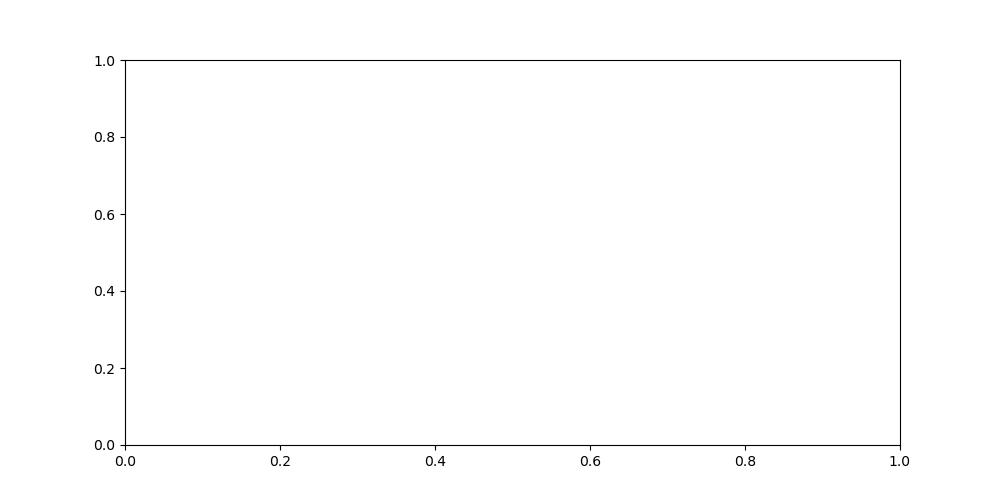

In [9]:
class StockGraph():
    def __init__(self):
        self.tickers = {}
        self.lines = []
        self.views = {
            "Raw Data": lambda x: x,
            "Rolling Average": lambda x: x.rolling(60).mean(),
            "Rolling Variance": lambda x: x.rolling(60).var(),
            "Rolling Standard Deviation": lambda x: x.rolling(60).var()**0.5,
            "Rolling Coefficient of Variation": lambda x: (x.rolling(60).var()**0.5) / (x.rolling(60).mean())
        }


    def plot_data(self, *args):
        while self.lines:
            item = self.lines.pop()
            item.remove()
        for tick in self.tickers.keys():
            df = self.tickers[tick]
            start = datetime(start_date.value.year, start_date.value.month, start_date.value.day)
            end = datetime(end_date.value.year, end_date.value.month, end_date.value.day)
            selection = df.loc[(df.index >= start) & (df.index <= end)]
            value = self.views[calculation.value](selection[data_type.value])
            x, = ax.plot(selection.index, value, label=tick)
            self.lines.append(x)
        self.finish_matplotlib()

    def render_stocks(self, *args):
        if stock_text.value != '':
            ticker = yf.download(stock_text.value.upper(), period="max", progress=False)
            if not ticker.empty:
                self.tickers[stock_text.value.upper()] = ticker
                self.plot_data()
        stock_text.value = ''
        boxes = [self.completed_stock(each) for each in self.tickers]
        tickersWidget.children = ([VBox([VBox(boxes), HBox([stock_text, stock_button])])])


    def completed_stock(self, ticker): 
        tickerField = Text(value=ticker)
        removeButton = Button(description='Remove', button_style='danger',)
        return HBox([tickerField, removeButton])


    def completed_stock(self, ticker):
        def remove_stock(_):
            if tickerField.value in self.tickers.keys():
                self.tickers.pop(tickerField.value)
                self.render_stocks()
            self.plot_data()
                    
        tickerField = Text(value=ticker)
        removeButton = Button(description='Remove', button_style='danger')
        removeButton.on_click(remove_stock)
        stock_view = HBox([tickerField, removeButton])
        return stock_view
    
    def finish_matplotlib(self):
        ax.legend()
        title = f"{calculation.value} of {data_type.value} from {start_date.value.strftime('%Y/%m/%d')}"
        title += f" to {end_date.value.strftime('%Y/%m/%d')}"
        ax.set_title(title)
        ax.relim()
        ax.autoscale()
        fig.canvas.draw_idle()

fig, ax = plt.subplots(figsize=(10, 5))
graph = StockGraph()

# Setting up a basic view with an empty field and a button
stock_text = widgets.Text(value='')
stock_button = widgets.Button(description='Add')                                 
stock_button.on_click(graph.render_stocks)
tickersWidget = HBox([stock_text, stock_button],layout=Layout(width='30%',))

# Choose data to be shown
calculation = widgets.Dropdown(value="Raw Data", options=graph.views.keys(),layout=Layout(width='95%',))
data_type = widgets.Dropdown(value="Close", options=['Open', 'Close', 'High', 'Low', 'Volume'],layout=Layout(width='95%',))
calculation.observe(graph.plot_data)
data_type.observe(graph.plot_data)
dropdowns = VBox([calculation, data_type],layout=Layout(width='20%',))

#Choose dates to be shown
start_date = widgets.DatePicker(value=datetime.today() - timedelta(days=365), description='Start Date',disabled=False)
end_date = widgets.DatePicker(value=datetime.today(), description='End Date',disabled=False)
start_date.observe(graph.plot_data)
end_date.observe(graph.plot_data)
dates = VBox([start_date, end_date])

final_view = HBox([tickersWidget, dropdowns, dates])
display(final_view)

